In [1]:
#Webwork
from bs4 import BeautifulSoup
from urllib.request import urlopen  #urllib2
#from urllib2 import urlopen

#offline
import re
import numpy as np

#plotting
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

%matplotlib inline

url = "http://www.ru.nl/artificialintelligence/"

In [2]:
def make_soup(url):
    html = urlopen(url).read()
    return BeautifulSoup(html,"lxml")



In [3]:
def crawler(url,maxlevel,link_list,link_tuple_list):
    if (maxlevel == 0):
        return
    else:
    #try to open link if not possible skip
    #NEW
        try:
            soup = make_soup(url)
        except:
            return
    
        links = soup.find_all('a', attrs={'href': re.compile("^http://www.ru.nl/artificialintelligence")}) 
        for link in links:
            link_url = link.get('href')#[:-1]
            link_tuple_list.append((url,link_url)) 
            link_list.append(link_url)
            crawler(link_url,maxlevel -1,link_list,link_tuple_list)
        return list(set(link_list)),link_tuple_list


In [4]:
link_list = []
link_tuple_list = []
link_list,link_tuple_list = crawler(url,1,link_list,link_tuple_list)
link_tuple_list[0]

NameError: name 'URL' is not defined

In [5]:




def crawler_matrix(url,num_rec):
    
    llist=[]
    ltlist = []

    link_list,link_tuple_list = crawler(url,num_rec,llist,ltlist)    

    matrix = np.zeros((len(link_list),len(link_list)))
    

    for id1 in range(len(link_list)):
        for id2 in range(len(link_list)):
            if not link_list[id1] is link_list[id2]:
                try:
                    idx = link_tuple_list.index((link_list[id1],link_list[id2]))

                    matrix[id1,id2] = 1
                except:
                    error = 1

    return matrix,link_list


In [6]:
X, link_list = crawler_matrix(url,3)



In [7]:
sum(sum(X))



2293.0

In [8]:
X.shape

(146, 146)

In [9]:
link_list[:5]



['http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2013-0/vm-good-aifternoon/prof-dr-friederike/',
 'http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2012/vm-good-aifternoon/cyrill-stachniss/@960852/disclaimer-en/',
 'http://www.ru.nl/artificialintelligence/contact/adres-secretary/',
 'http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2013-0/vm-good-aifternoon/dr-khiet-truong/',
 'http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2013-0/vm-good-aifternoon/dr-jeremy-hill/']

In [10]:
def normalize_matrix(Q):
    M = Q.shape[1]

    Q_star = np.apply_along_axis(lambda X: X/np.sum(X,axis=0),1,Q)
    mask = np.where(np.isnan(Q_star))
    
    Q_star[mask] = 1/M

    alpha = .85
    J = np.ones((M,M))
    
    G = alpha*Q_star + (1-alpha) * J/M
    return G

In [11]:
Q = normalize_matrix(X)
Q

C:\Users\Trost\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


array([[ 0.0010274 ,  0.0010274 ,  0.03644406, ...,  0.0010274 ,
         0.0010274 ,  0.03644406],
       [ 0.00684932,  0.00684932,  0.00684932, ...,  0.00684932,
         0.00684932,  0.00684932],
       [ 0.0010274 ,  0.0010274 ,  0.0010274 , ...,  0.0010274 ,
         0.0010274 ,  0.03798392],
       ..., 
       [ 0.0010274 ,  0.0010274 ,  0.03798392, ...,  0.0010274 ,
         0.0010274 ,  0.03798392],
       [ 0.00684932,  0.00684932,  0.00684932, ...,  0.00684932,
         0.00684932,  0.00684932],
       [ 0.0010274 ,  0.0010274 ,  0.03644406, ...,  0.0010274 ,
         0.0010274 ,  0.0010274 ]])

In [18]:

def Pagerank(Q_star):
    M = Q_star.shape[1]
    
    #random start
    draws = np.random.random((M,))
    p = draws/np.sum(draws)
    #iterate and store
    N = 50
    store_p = np.zeros((M,N))
    
    for i in range(N):
        p = np.dot(p,Q_star)
        store_p[:,i] = p
        
    plt.close()
    plt.xkcd()
  #  a = plt.figure()

    
    for i in range(M):
        plt.plot(store_p[i,])
    return store_p
    
    a.title("'This converges nicely', he said, staring into the fiery abyss")
    plt.xlabel('convergence')
    plt.ylabel('density of tears')
    plt.show()




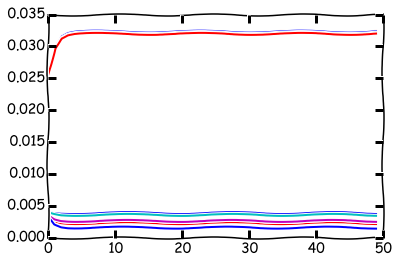

In [19]:
G = Pagerank(Q)



In [14]:
ind3 = G[:,-1].argmax()



In [15]:
link_list[ind3]



'http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2013-0/'

In [16]:
sorted_arr = G[:,-1].argsort()
sorted_arr

array([ 78, 107, 128,  86,  84, 144,  34,  54,  16,  11,  85,  72, 110,
       139,  53,  55,  67, 115,   1, 120, 133, 105,  56, 118, 134,  73,
        66,  77,  24,  80,  90,  31,  12,  99,  22,   5,  95,  20, 124,
        98,  15, 106,  40,  68,  88,  81, 121,  32,  59,  94,  65,  76,
       103,  87,  83,  61, 113, 100,   0,   4,  14,  38,  46,  47,  37,
         3,  41,  50,  17, 108,  92,   8,  93,  82, 137,  75,  97,  89,
        25,  44,  35, 111,  91,  10, 136, 114,  60,   6,  27,  23,  51,
       112,  49,  52,  79,  43,  48, 123,   9,  28, 109, 104,  29,  42,
       119, 131, 135, 143, 132,  19, 141, 142, 127, 102,  26,  70, 140,
       126,  62,   7,  13,  64,  18,  74,  63,  69,   2, 122,  39,  36,
       101,  58, 125, 138,  57, 129, 117,  96,  33,  71, 145, 130,  45,
        30, 116,  21], dtype=int64)

In [17]:




for i in range(15):
    print(i,' th ',link_list[sorted_arr[-(i+1)]])


0  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2013-0/
1  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2012/
2  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2014/
3  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2015/
4  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2011/
5  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2009/
6  th  http://www.ru.nl/artificialintelligence/news-events/
7  th  http://www.ru.nl/artificialintelligence/
8  th  http://www.ru.nl/artificialintelligence/vm/sitemap/
9  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2008/
10  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2007/
11  th  http://www.ru.nl/artificialintelligence/news-events/news/
12  th  http://www.ru.nl/artificialintelligence/news-events/good-aifternoon-2010/
13  th  http://www.ru.nl/artificia